In [11]:
#7th main stuff

import numpy as np
import pandas as pd
import pylab
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn.datasets import load_digits


digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

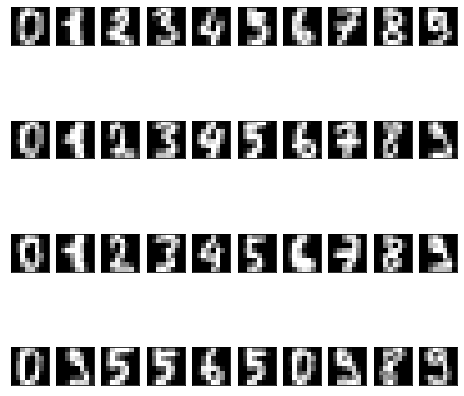

In [14]:
# viz some of the digits
fig, ax = plt.subplots(4, 10, figsize = (8, 8), subplot_kw=dict(xticks = [], yticks=[]))

for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap = "gray")

In [16]:
X = digits.data
y = digits.target

X.shape

(1797, 64)

In [17]:
# use pc to shrink dim of X from 64 to 50
from sklearn.decomposition import PCA

model = PCA(50).fit(X)

Text(0, 0.5, 'cummulative variance')

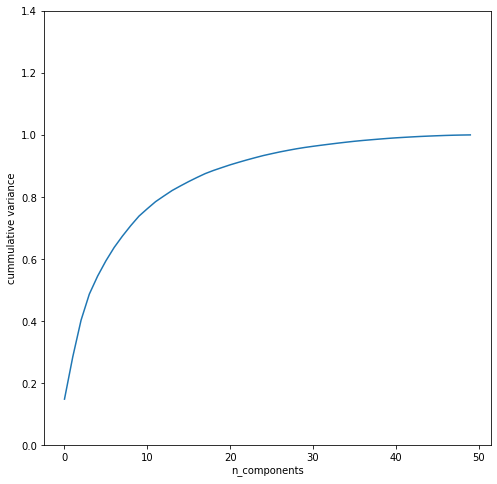

In [18]:
# viz result, via line here line is close to one so will still capture 
# most of the dataset variance
plt.figure(figsize = (8, 8))
plt.plot(np.cumsum(model.explained_variance_ratio_))

pylab.ylim([0, 1.4])

plt.xlabel("n_components")
plt.ylabel("cummulative variance")

In [19]:
# helper function
classes = list(range(10))
target_names = digits.target_names


def apply_manifold_learning(X, y, method):
    
    X = method.fit_transform(X) # transforms X to lower dim using the manifold model's fit transform
    
    print("New shape of X: ", X.shape)
    print()
    print("Sample X: \n")
    print(pd.DataFrame(X).sample(10))
    print()
    
    fig, ax = plt.subplots(figsize = (8, 8))
    # viz transformed data by plot cord of first two dim
    for i, target_name in zip(classes, target_names):
        plt.scatter(X[y == i, 0], X[y == i, 1],
                   label = target_name, cmap = plt.cm.Spectral, s = 100)
        
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend()
    plt.show()
    
    return method

**Manifold accessment**

New shape of X:  (1797, 2)

Sample X: 

              0          1
474  -10.722341  30.555706
1564 -34.848910   2.272324
925   17.755253  21.394304
1046 -20.290455 -24.013979
668    8.416766 -18.920527
1187  10.799660  16.803572
968   -6.767241  36.959647
648    5.872152 -30.481282
1476 -16.743242 -30.808128
574   -8.268487  18.176182



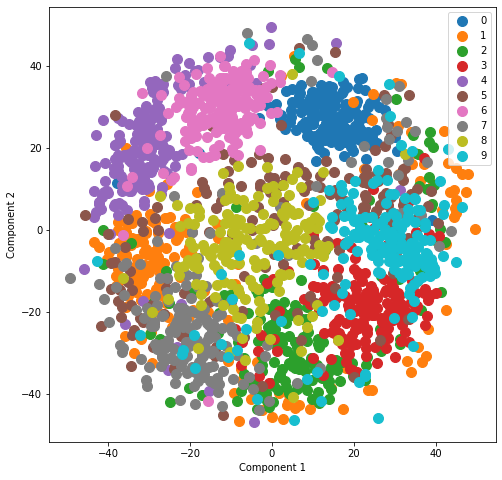

In [21]:
from sklearn.manifold import MDS

msd = apply_manifold_learning(X, y, MDS(n_components = 2, metric = True, n_init = 1, max_iter = 100))

New shape of X:  (1797, 2)

Sample X: 

              0          1
1261  41.017024  18.936417
1277 -18.153972   8.143842
382   80.413692   7.701606
343   -0.135748  73.518932
1548 -13.281164 -37.667020
1294 -90.927305  11.562569
1711 -62.334507  13.856791
1523 -38.638116   0.659778
476  -22.990950  20.893134
298  -21.548376  21.488519



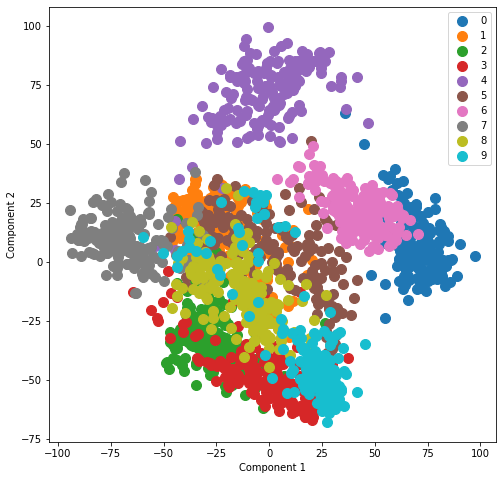

In [22]:
from sklearn.manifold import Isomap

isomap = apply_manifold_learning(X, y, Isomap(n_neighbors=30, n_components = 2))

New shape of X:  (1797, 2)

Sample X: 

             0         1
1571  0.011996 -0.009118
603   0.006758 -0.010851
641   0.000537 -0.008341
241   0.013181 -0.002762
1532  0.004331  0.001518
1670  0.006538 -0.004944
1473  0.003446  0.080040
1190  0.008288 -0.005300
171   0.006555 -0.004419
1573 -0.036960 -0.003546



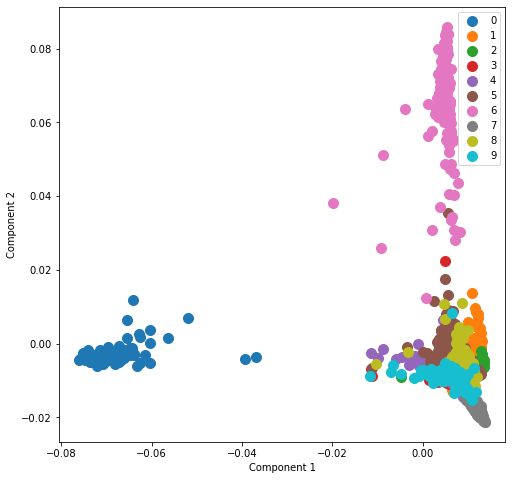

In [25]:
from sklearn.manifold import LocallyLinearEmbedding

lle = apply_manifold_learning(X, y, LocallyLinearEmbedding(n_neighbors = 30, n_components=2, method ="modified"))

New shape of X:  (1797, 2)

Sample X: 

             0         1
1721 -0.001567 -0.000490
1344 -0.001033 -0.001772
315  -0.001273 -0.001703
1608  0.002058  0.003016
1556 -0.001269  0.001019
1559  0.000470  0.002528
938  -0.000337 -0.001965
636   0.000131 -0.001881
419  -0.000576 -0.000463
1436 -0.000679  0.000102



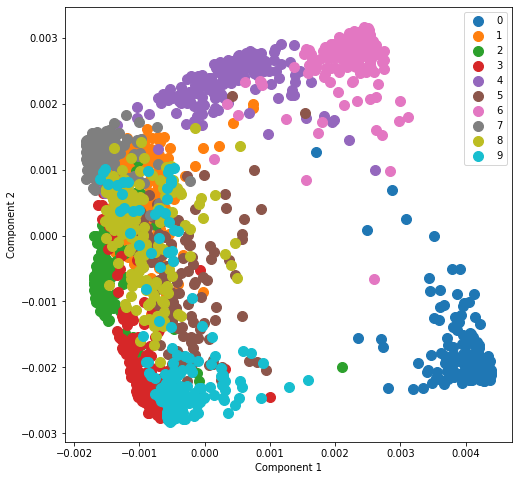

In [26]:
from sklearn.manifold import SpectralEmbedding

spectral_em = apply_manifold_learning(X, y, \
                                     SpectralEmbedding(n_components=2, random_state =0, eigen_solver = "arpack"))

New shape of X:  (1797, 2)

Sample X: 

              0          1
436  -40.759167 -23.463972
535  -21.586349  32.467026
1061 -19.721151  -3.532396
456   34.196529 -10.686704
882   31.292116  23.803364
475  -39.875385  13.821407
358  -18.619581   8.907333
1567  65.169067  -6.910714
1340   8.779553 -16.453741
1076  21.460535 -22.623280



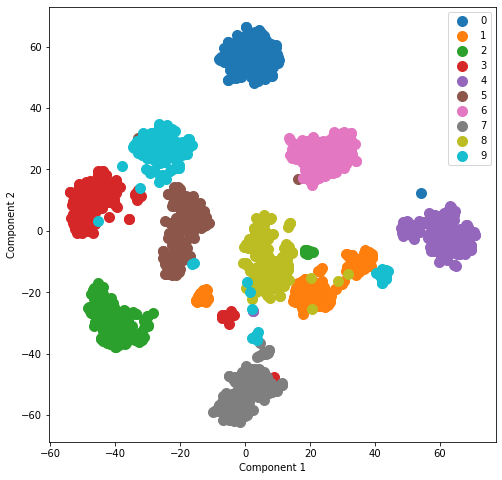

In [27]:
from sklearn.manifold import TSNE

tsne = apply_manifold_learning(X, y, TSNE(n_components=2, init = "pca", random_state = 0))